In [8]:
import numpy as np
import matplotlib.pyplot as plt

from compression import calculateCompRatio, compress_dataset
from utils.personal_utils import *

import os
import pywt

import matplotlib.pyplot as plt


In [21]:
all_datasets = [
                "/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts", 
                "/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts",


                ]

#all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts"]

""" all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts",
                
                "/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts",,] """



' all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts",\n                \n                "/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts",\n                "/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts",,] '

66it [00:01, 38.33it/s] 
100%|██████████| 42/42 [00:00<00:00, 361.88it/s]
5072it [00:10, 461.09it/s]
100%|██████████| 5048/5048 [00:04<00:00, 1049.81it/s]
1351it [00:01, 819.47it/s]
100%|██████████| 1328/1328 [00:00<00:00, 1443.96it/s]
216it [00:00, 12497.00it/s]
100%|██████████| 202/202 [00:00<00:00, 2513.88it/s]
74it [00:00, 24165.25it/s]
100%|██████████| 61/61 [00:00<00:00, 2355.59it/s]


Text(0.5, 0.98, 'Dropout_Ratio vs MAE for different Quantization Precisions')

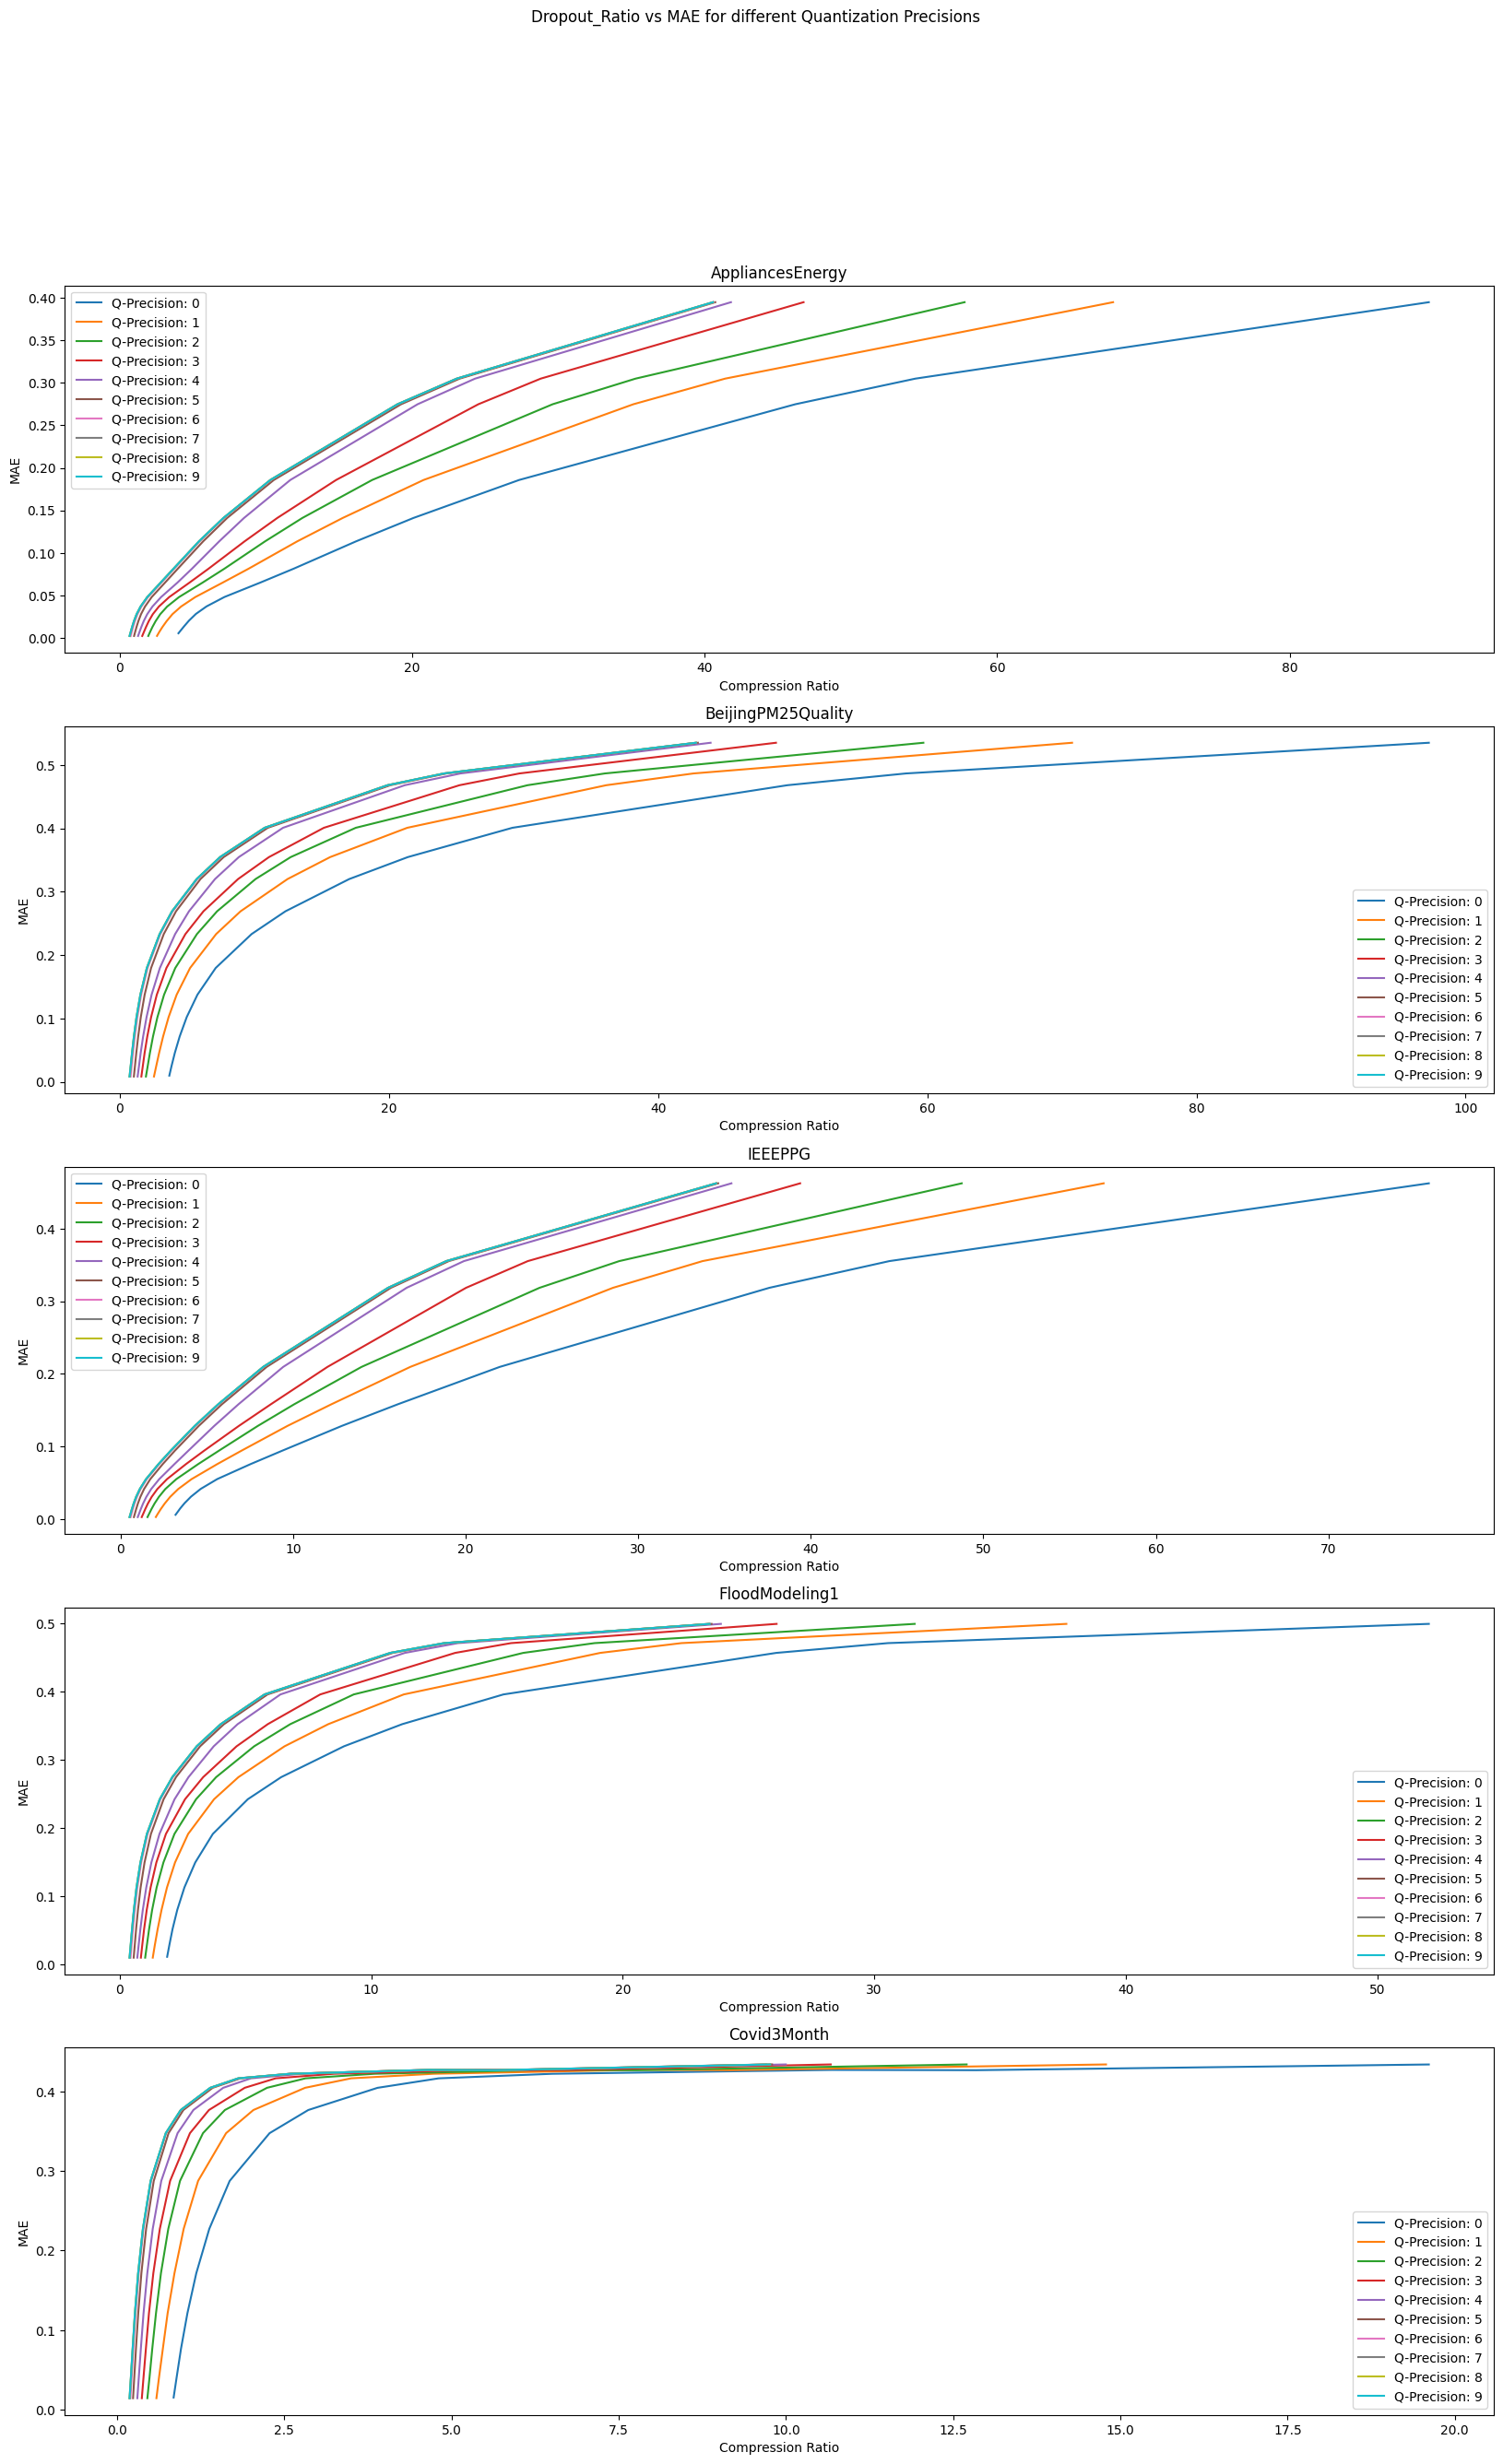

In [22]:
# Quantization Study
# for each dataset, for eachtechnique calculate the comp_ratio vs mae for 5 quantization levels -> 2 to 7



plt.figure(figsize=(20,30))
for subplot_id, dataset_path in enumerate(all_datasets):

    # My Params
    dataset_id = os.path.basename(dataset_path).split('_')[0]
    level = pywt.dwt_max_level(1008, "db4")
    
    dropout_values  = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.925, 0.95, 0.975, 0.98, 0.99]
    dataset_array = load_dataset(dataset_path)


    plt.subplot(5,1,subplot_id+1)

    for preci in range(0,10):
        
        comp_ratios = np.empty_like(dropout_values)
        maes = np.empty_like(dropout_values)


        for i,step in enumerate(dropout_values):
            
            array_flatdim = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= False, compression_type= "dct", compression_param=step, wavelet="db4", level= level, quantization_level=preci)
            comp_ratios[i] = calculateCompRatio(dataset_array, array_flatdim)
            # Get RMSE
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type= "dct", compression_param=step, wavelet= "db4", level = level, quantization_level= preci)
            maes[i]= compute_avg_mae_of_dataset(dataset_array, decomp_dataset_array)
           

        
        plt.plot(comp_ratios, maes, label=f'Q-Precision: {preci}')

    plt.xlabel("Compression Ratio")
    plt.ylabel("MAE")
    plt.title(f"{dataset_id}")
    plt.legend()
    #plt.grid(color='gray', linestyle='--', linewidth=0.5)


plt.suptitle("Dropout_Ratio vs MAE for different Quantization Precisions")




0it [00:00, ?it/s]

66it [00:01, 38.88it/s] 
100%|██████████| 42/42 [00:00<00:00, 402.50it/s]
/home/sim/Desktop/TS Extrinsic Regression/TSER Code/compression.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  array_flatdim_coeff[:,i] = np.array(coeff_list)
5072it [00:13, 383.61it/s]
100%|██████████| 5048/5048 [00:06<00:00, 803.90it/s] 
/home/sim/Desktop/TS Extrinsic Regression/TSER Code/compression.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  array_flatdim_coeff[:,i] = np.array(coeff_list)
1351it [00:01, 739.85it/s]
100%|██████████| 1328/1328 [00:00<00:00, 1394.80it/s]
/home/sim/Desktop/TS Extrinsic Regression/TSER Code/compression.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  array_flatdim_coeff[:,i] = np.array(coeff_list)
216it [00:00, 12404.43it/s]
100%|██████████| 202/202 [00:00<00:00, 2469.26it/s]
/home/sim/Desktop/TS Extrinsic Regression/.venvAutogluon/lib/python3.10/site-packages/pywt/_m

Text(0.5, 0.98, 'Compression Ratio vs RMSE for Different Compression Techniques')

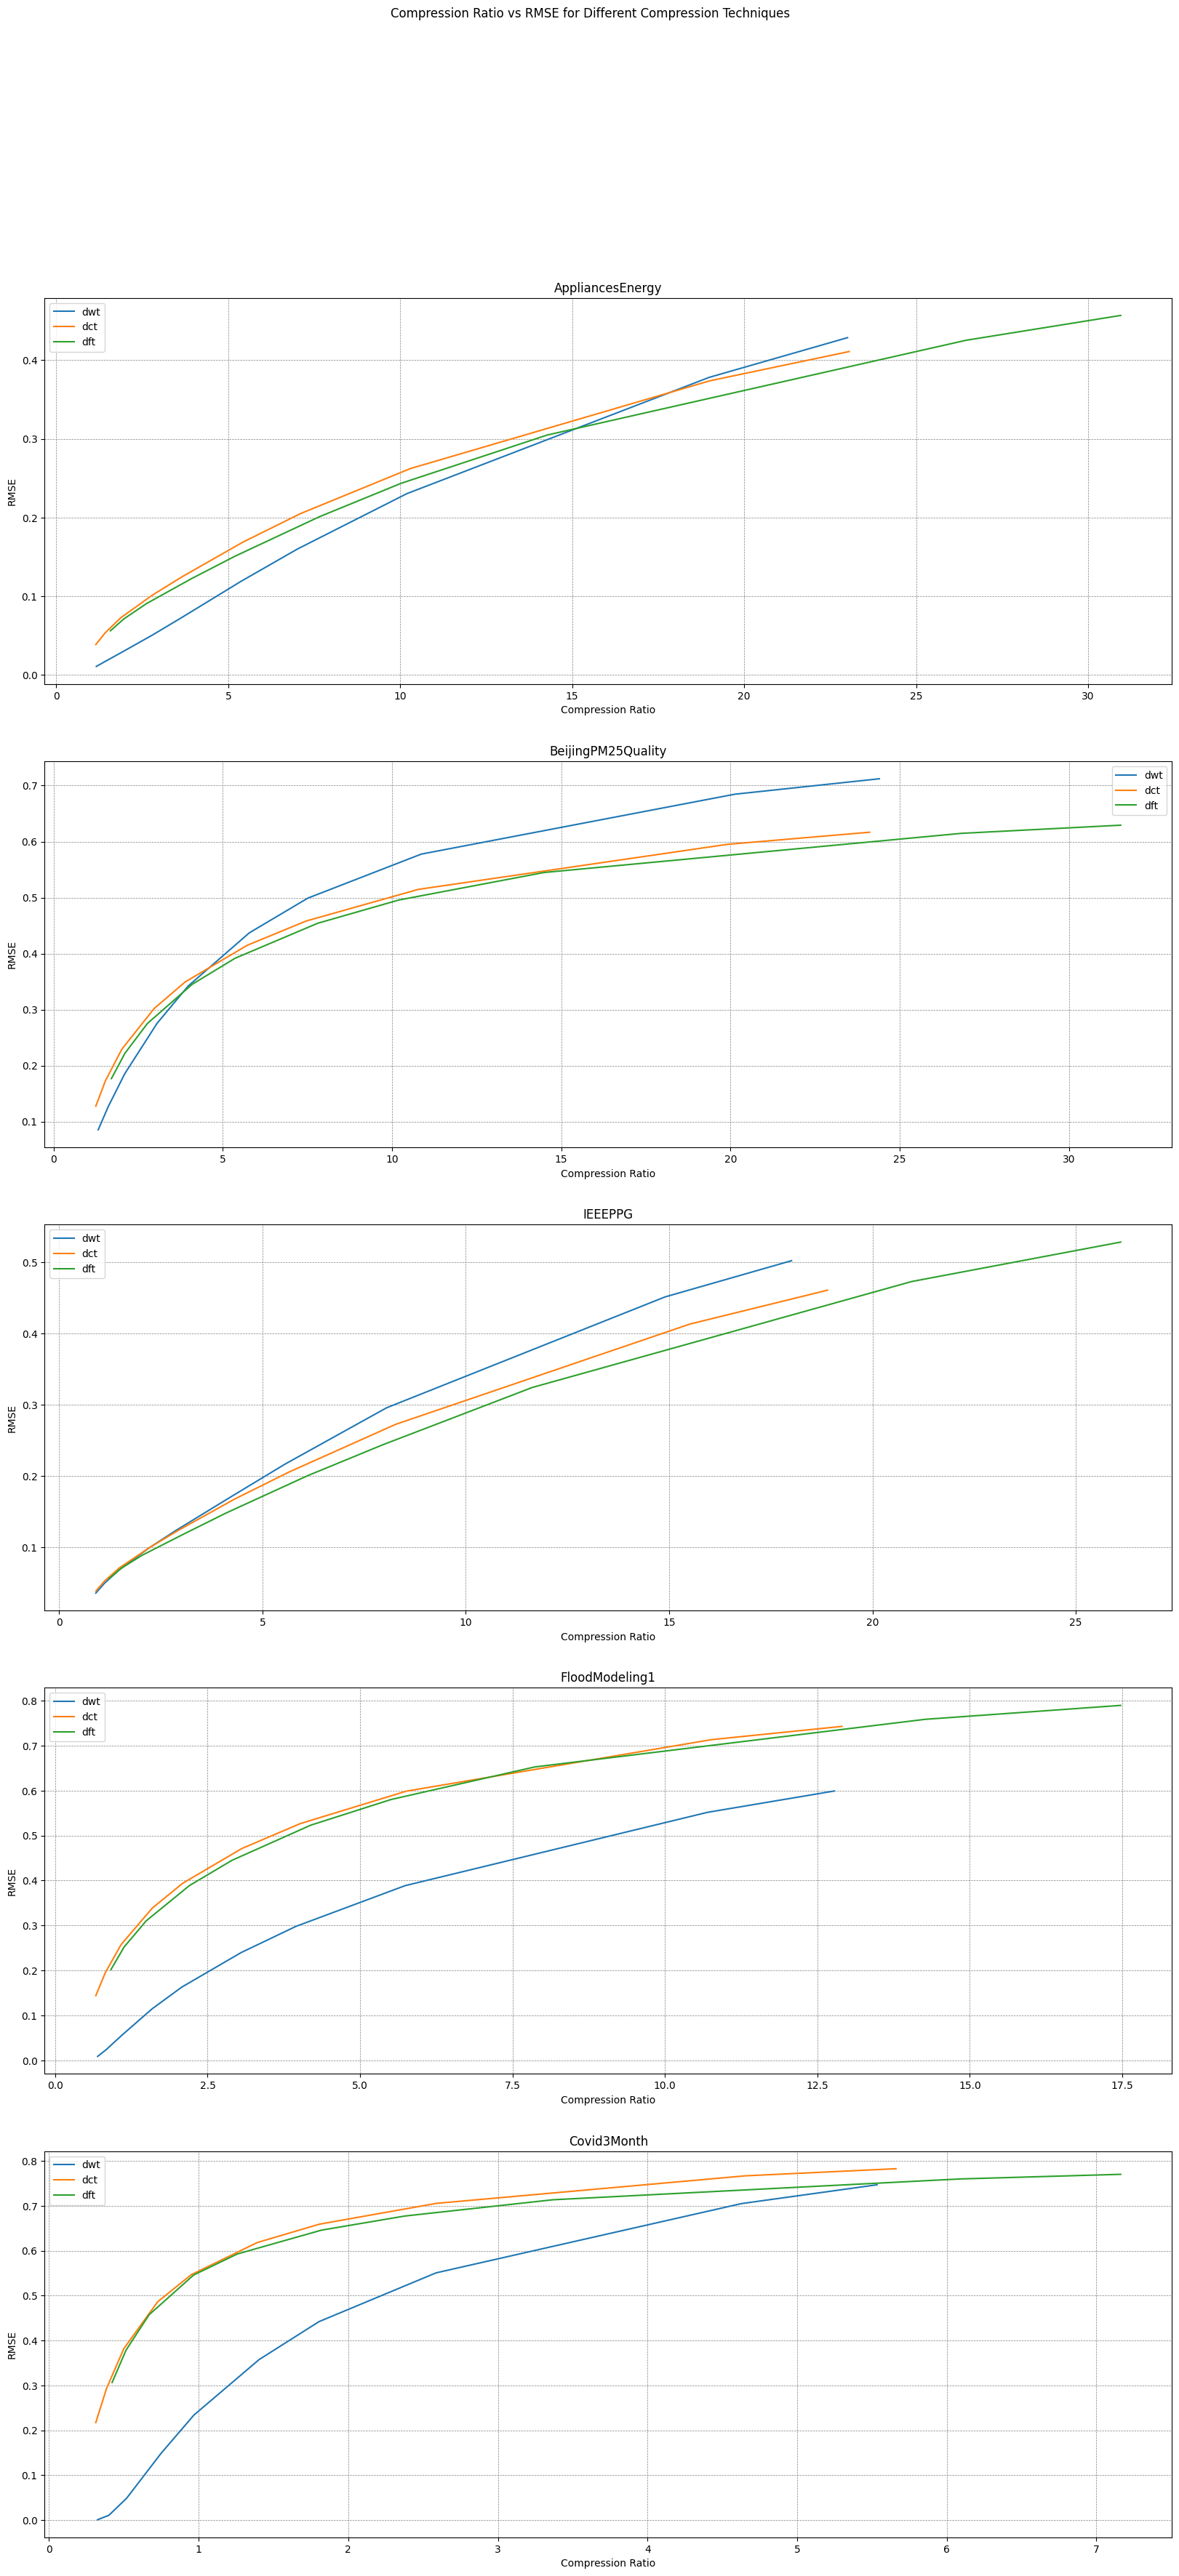

In [ ]:
# Plot Dropout-Value vs Compression Ratio and RMSE for each Dataset
# All 3 Techniques in one plot




all_datasets = [
                "/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts", 
                "/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts",


                ]

""" all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts",
                
                "/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts",,] """




plt.figure(figsize=(20,30))
for subplot_id, dataset_path in enumerate(all_datasets):

    # My Params
    compression_types =["dwt", "dct", "dft"]
    dataset_id = os.path.basename(dataset_path).split('_')[0]

    
    # make smaller steps for more accurate plot

    steps  = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.925, 0.95, 0.975, 0.98]

    dataset_array = load_dataset(dataset_path)

    level = pywt.dwt_max_level(1008, "db4")

    plt.subplot(5,1,subplot_id+1)

    for compression_type in compression_types:

        comp_ratios = np.empty_like(steps)
        rmses = np.empty_like(steps)


        for i,step in enumerate(steps):
            # Get CompRatio
            array_flatdim = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= False, compression_type=compression_type, compression_param=step, wavelet="db4", level= level)
            comp_ratios[i] = calculateCompRatio(dataset_array, array_flatdim)
            # Get RMSE
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type=compression_type, compression_param=step, wavelet="db4", level = level)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
            #print(f"Step {i} done")

        
        plt.plot(comp_ratios,rmses,label=compression_type)

    plt.xlabel("Compression Ratio")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id}")
    plt.legend()
    #plt.grid(color='gray', linestyle='--', linewidth=0.5)


plt.suptitle("Compression Ratio vs RMSE for Different Compression Techniques")